<a href="https://colab.research.google.com/github/luciaPi/Neural-networks-course/blob/main/2Neuronova_siet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PyTorch**

<img src="https://venturebeat.com/wp-content/uploads/2019/06/pytorch-e1576624094357.jpg?w=1024?w=1200&strip=all" width=30% align="right" style="float:right">

**PyTorch** je open-source framework pre umelú inteligenciu (neurónové siete) v jazyku **Python**.

PyTorch je vlastne knižnica na spracovanie **tenzorov**. Čo sú teda tenzory? **Tenzory** sú viacrozmerné polia, ktoré obsahujú naše dáta. Tenzory sú v podstate to isté ako polia (arrays) v knižnici Numpy. Ale PyTorch tenzory umožňujú rýchlejšie spracovanie na **GPU karte**.

Pre tréning modelov neurónových sietí sa používajú **GPU karty**, keďže výpočty sú založené na násobení viacrozmerných polí, ktoré dokážu GPU karty vykonávať **rýchlejšie** ako CPU.



In [1]:
import torch
from torch import nn
import pandas as pd

# **Tenzory**
**Tenzory** obsahujú naše dáta.


In [2]:
# Creating tensors of different dimensions:
# tensor with single element
a = torch.tensor([1])
# Vector tensor: 1 dimensional(integer values)
b = torch.tensor([1, 2, 3, 4, 5])
# Matrix tensor: 2 dimensional (floating values)
# Note: Here one one element is written in float, but PyTorch #converts the rest for you (1. = 1.0)
c = torch.tensor([[1., 2, 3],[6, 7, 8]])
# 3 dimensional tensor (integer values)
d = torch.tensor([[[1, 2, 3, 4],[11, 12, 13, 14]],[[1, 2, 3, 4],[6, 7, 8, 9]]])

a, b, c, d

(tensor([1]),
 tensor([1, 2, 3, 4, 5]),
 tensor([[1., 2., 3.],
         [6., 7., 8.]]),
 tensor([[[ 1,  2,  3,  4],
          [11, 12, 13, 14]],
 
         [[ 1,  2,  3,  4],
          [ 6,  7,  8,  9]]]))

In [3]:
print(c.mean())
print(c.sum())
print(c.view(3,2)) # reshape

tensor(4.5000)
tensor(27.)
tensor([[1., 2.],
        [3., 6.],
        [7., 8.]])


In [4]:
a = torch.zeros(3,4)
b = torch.ones(4,3)
c = torch.rand(2,3) # random <0,1)

a,b,c

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[0.6262, 0.5747, 0.3605],
         [0.2760, 0.1644, 0.7538]]))

### **Dataset Študenti**

https://www.kaggle.com/datasets/rkiattisak/student-performance-in-mathematics

#### **1. Príprava dát**

In [5]:
#!ls /root/.cache/kagglehub/datasets/rkiattisak/student-performance-in-mathematics/versions/3

import kagglehub

# Download latest version
path = kagglehub.dataset_download("rkiattisak/student-performance-in-mathematics")

print("Path to dataset files:", path)
data = pd.read_csv(path+"/exams.csv")

Path to dataset files: /root/.cache/kagglehub/datasets/rkiattisak/student-performance-in-mathematics/versions/3


In [6]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [7]:
# atributy nasho datasetu
data.keys()

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
# porzieme ake hodnoty nadobuda "lunch"
data['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [9]:
# zmenime "lunch" na 0-1 hodnoty
data['lunch'] = data['lunch'].replace({'free/reduced': 1, 'standard': 0})
data

<ipython-input-9-27bd564b965a>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['lunch'] = data['lunch'].replace({'free/reduced': 1, 'standard': 0})


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,0,completed,59,70,78
1,male,group D,associate's degree,0,none,96,93,87
2,female,group D,some college,1,none,57,76,77
3,male,group B,some college,1,none,70,70,63
4,female,group D,associate's degree,0,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,0,none,77,77,71
996,male,group C,some college,0,none,80,66,66
997,female,group A,high school,0,completed,67,86,86
998,male,group E,high school,0,none,80,72,62


In [10]:
# upravime aj "gender" a "parental level of education"
data['gender'] = data['gender'].replace({'female': 1, 'male': 0})
data['parental level of education'] = data['parental level of education'].replace({'some high school': 0,'high school':0,'some college':1,"associate's degree":2,"bachelor's degree":3,"master's degree":4})
data

<ipython-input-10-4721a84fcc0c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'] = data['gender'].replace({'female': 1, 'male': 0})
<ipython-input-10-4721a84fcc0c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['parental level of education'] = data['parental level of education'].replace({'some high school': 0,'high school':0,'some college':1,"associate's degree":2,"bachelor's degree":3,"master's degree":4})


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group D,1,0,completed,59,70,78
1,0,group D,2,0,none,96,93,87
2,1,group D,1,1,none,57,76,77
3,0,group B,1,1,none,70,70,63
4,1,group D,2,0,none,83,85,86
...,...,...,...,...,...,...,...,...
995,0,group C,1,0,none,77,77,71
996,0,group C,1,0,none,80,66,66
997,1,group A,0,0,completed,67,86,86
998,0,group E,0,0,none,80,72,62


**Úloha**

Zmente na 0-1 hodnoty stlpec "test preparation course"

In [11]:
???

<ipython-input-11-c6e4182aa483>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['test preparation course'] = data['test preparation course'].replace({'completed': 1, 'none': 0})


In [12]:
# vymazeme stlpec "race/ethnicity"
data =data.drop(columns=['race/ethnicity'])
data

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,0,1,59,70,78
1,0,2,0,0,96,93,87
2,1,1,1,0,57,76,77
3,0,1,1,0,70,70,63
4,1,2,0,0,83,85,86
...,...,...,...,...,...,...,...
995,0,1,0,0,77,77,71
996,0,1,0,0,80,66,66
997,1,0,0,1,67,86,86
998,0,0,0,0,80,72,62


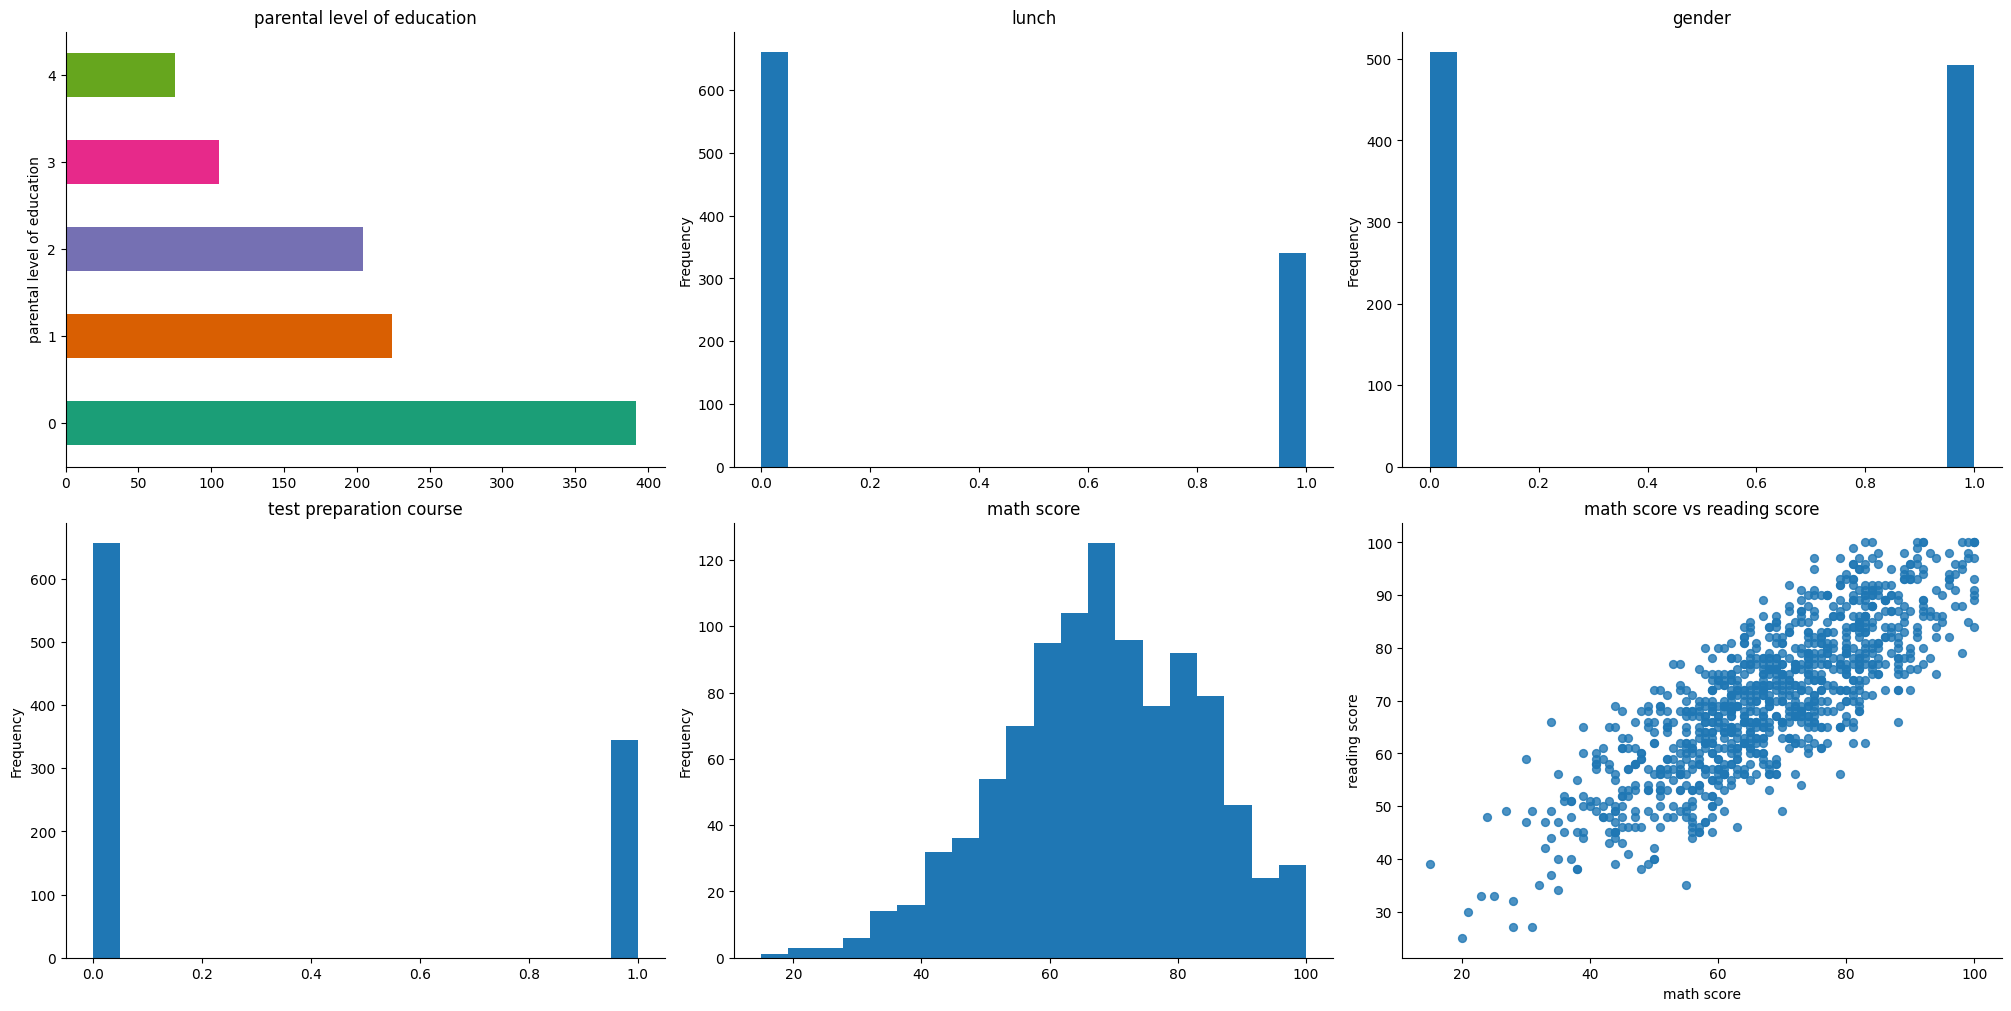

In [13]:
# vizualizujeme data
from matplotlib import pyplot as plt
import seaborn as sns

# Set up a 2x4 grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10), constrained_layout=True)

# Plot 1: Grouped by 'parental_level_of_education'
data.groupby('parental level of education').size().plot(kind='barh', ax=axes[0, 0], color=sns.palettes.mpl_palette('Dark2'), title='parental level of education')
axes[0, 0].spines[['top', 'right']].set_visible(False)

# Plot 2: 'lunch'
data['lunch'].plot(kind='hist', bins=20, ax=axes[0, 1], title='lunch')
axes[0, 1].spines[['top', 'right']].set_visible(False)

# Plot 3: 'gender'
data['gender'].plot(kind='hist', bins=20, ax=axes[0, 2], title='gender')
axes[0, 2].spines[['top', 'right']].set_visible(False)

# Plot 4: 'test_preparation_course'
data['test preparation course'].plot(kind='hist', bins=20, ax=axes[1, 0], title='test preparation course')
axes[1, 0].spines[['top', 'right']].set_visible(False)

# Plot 5: 'math_score'
data['math score'].plot(kind='hist', bins=20, ax=axes[1, 1], title='math score')
axes[1, 1].spines[['top', 'right']].set_visible(False)

# Plot 6: Scatter plot of 'math_score' vs 'reading_score'
data.plot(kind='scatter', x='math score', y='reading score', s=32, alpha=0.8, ax=axes[1, 2], title='math score vs reading score')
axes[1, 2].spines[['top', 'right']].set_visible(False)

**Úlohy**

1. Čo budú vstupy $x$? (napr. 3)
2. Čo bude naša sieť predikovať? Čiže čo bude výstup $y$ (labels)?

In [15]:
# vstupy
input_name1 = '???'
input_name2 = '???'
input_name3 = '???'
inputs = data[[input_name1,input_name2,input_name3]].copy()
inputs

,lunch,test preparation course,math score
0,0,1,59
1,0,0,96
2,1,0,57
3,1,0,70
4,0,0,83
...,...,...,...
995,0,0,77
996,0,0,80
997,0,1,67
998,0,0,80


In [16]:
# vystup
output_name = '???'
labels = data[output_name].copy()
labels

,reading score
0,70
1,93
2,76
3,70
4,85
...,...
995,77
996,66
997,86
998,72


In [17]:
# upravime data na tenzory
x_data = torch.tensor(inputs.values, dtype=torch.float32)
y_data = torch.tensor(labels.values, dtype=torch.float32)

In [18]:
# pozrite si, co obsahuju nove tenzory
???

(tensor([[ 0.,  1., 59.],
         [ 0.,  0., 96.],
         [ 1.,  0., 57.],
         ...,
         [ 0.,  1., 67.],
         [ 0.,  0., 80.],
         [ 0.,  0., 58.]]),
 tensor([ 70.,  93.,  76.,  70.,  85.,  57.,  83.,  61.,  75.,  69.,  69.,  50.,
          74.,  73.,  54.,  46.,  47.,  92.,  82.,  71.,  66.,  71.,  71.,  88.,
          85.,  83.,  52.,  66.,  79.,  87.,  81.,  76.,  78.,  35.,  82.,  53.,
          74.,  66.,  85.,  85.,  46.,  82.,  82.,  73.,  56.,  71.,  82.,  76.,
          52.,  77.,  77.,  83.,  93.,  72.,  67.,  64.,  75.,  93.,  86.,  66.,
          74.,  69.,  83.,  68.,  74.,  34.,  77.,  91.,  62.,  70.,  81.,  82.,
          33.,  58.,  49.,  46.,  91.,  61.,  75.,  61.,  80.,  93.,  46.,  77.,
          89.,  97.,  68.,  79.,  65.,  62.,  67.,  74.,  51.,  75.,  88.,  96.,
          84.,  80.,  90.,  62.,  72.,  50.,  69.,  58.,  90.,  75.,  76.,  78.,
          58.,  81.,  84.,  79.,  86.,  64.,  72.,  95.,  96.,  71.,  55.,  91.,
          74.,  84

In [19]:
# pozrite si rozmery tenzorov pomocou .shape
???

(torch.Size([1000, 3]), torch.Size([1000]))

#### **2. Príprava neurónovej siete**

In [20]:
# prioritne budeme trenovat na GPU karte
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [21]:
# postavime neuronovu siet

class StudentiModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(3, 3)  # torch.nn.Linear(in_features, out_features)
        self.linear2 = nn.Linear(3, 2)
        self.linear3 = nn.Linear(2, 1)

    def forward(self, x):  # x = vstup
        y123 = self.linear1(x)
        y45 = self.linear2(y123)
        y6 = self.linear3(y45)
        print("1. vsrtva", y123.detach().numpy())
        print("2. vsrtva", y45.detach().numpy())
        print("3. vsrtva", y6.detach().numpy())
        return y6


**Úlohy**
1. Koľko vrstiev má neurónová sieť?
2. Koľko neurónov je v jednotlivých vrstvách?
3. Nakreslite obrázok siete.

In [22]:
# vyrvorime neuronovu siet
model = StudentiModel().to(device).eval()
model

StudentiModel(
  (linear1): Linear(in_features=3, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=2, bias=True)
  (linear3): Linear(in_features=2, out_features=1, bias=True)
)

**Váhy siete**

In [23]:
# vahy su inicializovane nahodne
for name, param in model.named_parameters():
  param.requires_grad = False
  print(name, "-", param.detach().numpy())

linear1.weight - [[-0.4122892  -0.32156828 -0.28161982]
 [-0.21606903  0.3354428  -0.49821275]
 [-0.24705228  0.5527921  -0.27864808]]
linear1.bias - [-0.28511313 -0.15393591  0.32262456]
linear2.weight - [[ 0.30838248 -0.2719462  -0.44672576]
 [-0.57597554 -0.15458375 -0.03161507]]
linear2.bias - [0.42183632 0.2621    ]
linear3.weight - [[-0.00808865  0.00709062]]
linear3.bias - [0.0432763]


**Výstup siete pre konkrétneho študenta**

In [24]:
# vyberte studenta
index_vstupu = ???
print("Vstup =",x_data[index_vstupu])
y = model(x_data[index_vstupu]).item()
print("Vystup =",y)
print("Pozadovany vystup =",labels[index_vstupu])

Vstup = tensor([ 0.,  1., 59.])
1. vsrtva [-17.22225  -29.213045 -15.564821]
2. vsrtva [10.008378 15.18964 ]
3. vsrtva [0.07002591]
Vystup = 0.07002590596675873
Pozadovany vystup = 70


Váhy zaokrúhlime na 1 desatinné, aby sa nám jednoduchšie počítalo

In [25]:
# manualne vahy zaokruhlime
for param in model.parameters():
    transformed_param = torch.round(param, decimals = 1)
    param.copy_(transformed_param)

for name, param in model.named_parameters():
    print(name, "-", param.detach().numpy())

linear1.weight - [[-0.4 -0.3 -0.3]
 [-0.2  0.3 -0.5]
 [-0.2  0.6 -0.3]]
linear1.bias - [-0.3 -0.2  0.3]
linear2.weight - [[ 0.3 -0.3 -0.4]
 [-0.6 -0.2 -0. ]]
linear2.bias - [0.4 0.3]
linear3.weight - [[-0.  0.]]
linear3.bias - [0.]


Výstup siete pre konkrétneho študenta po zaokrúhlení

In [26]:
# vyberte studenta
index_vstupu = ???
print("Vstup =",x_data[index_vstupu])
y = model(x_data[index_vstupu]).item()
print("Vystup =",y)
print("Pozadovany vystup =",labels[index_vstupu])

Vstup = tensor([ 0.,  1., 59.])
1. vsrtva [-18.3      -29.400002 -16.800001]
2. vsrtva [10.450001 17.16    ]
3. vsrtva [0.]
Vystup = 0.0
Pozadovany vystup = 70


**Úloha**

1. Vypočítajte sami výstup siete pre daného študenta.
2. Vypočítajte chybu siete: \\
a) absolútnu chybu \\
b) štvorcovú chybu

#### **Ohodnotenie siete**

In [27]:
# postavime neuronovu siet bez zbytocnych vypisov

class StudentiModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(3, 3)  # torch.nn.Linear(in_features, out_features)
        self.linear2 = nn.Linear(3, 2)
        self.linear3 = nn.Linear(2, 1)

    def forward(self, x):  # x = vstup
        y123 = self.linear1(x)
        y45 = self.linear2(y123)
        y6 = self.linear3(y45)
        return y6

model = StudentiModel().to(device).eval()
model

StudentiModel(
  (linear1): Linear(in_features=3, out_features=3, bias=True)
  (linear2): Linear(in_features=3, out_features=2, bias=True)
  (linear3): Linear(in_features=2, out_features=1, bias=True)
)

**Absolútna chyba**

In [28]:
# vyberte studenta
index_vstupu = ???
print("Vstup =",x_data[index_vstupu])
y = model(x_data[index_vstupu]).item()
print("Vystup =",y)
print("Pozadovany vystup =",y_data[index_vstupu].item())
chyba1 = abs(y-y_data[index_vstupu].item())
print("Absolutna chyba =", chyba1)

Vstup = tensor([ 0.,  1., 59.])
Vystup = -3.991631031036377
Pozadovany vystup = 70.0
Absolutna chyba = 73.99163103103638


**Štvorcová chyba**

In [29]:
# vyberte studenta
index_vstupu = ???
print("Vstup =",x_data[index_vstupu])
y = model(x_data[index_vstupu]).item()
print("Vystup =",y)
print("Pozadovany vystup =",y_data[index_vstupu].item())
chyba2 = (y-y_data[index_vstupu].item())**2
print("Stvorcova chyba =", chyba2)

Vstup = tensor([ 0.,  1., 59.])
Vystup = -3.991631031036377
Pozadovany vystup = 70.0
Stvorcova chyba = 5474.761462633025


**Chyba celého datasetu**

In [44]:
# vystup celeho datasetu
y = model(x_data).detach().numpy()[:,0]
y

array([-3.991631  , -6.8020487 , -3.7748568 , -4.7489543 , -5.827951  ,
       -4.7039914 , -5.7530193 , -3.0555193 , -5.603158  , -3.8417697 ,
       -5.1535745 , -3.5800328 , -5.1985364 , -4.8538537 , -3.624995  ,
       -3.6999261 , -2.126384  , -6.127672  , -5.498259  , -4.441215  ,
       -4.449231  , -4.591076  , -4.8538537 , -6.277534  , -6.9888554 ,
       -5.1535745 , -3.8497875 , -4.8538537 , -5.603158  , -6.3524632 ,
       -5.565173  , -4.599093  , -4.6360383 , -1.9015921 , -5.715034  ,
       -3.8797555 , -4.6740236 , -4.666006  , -5.0106897 , -6.277534  ,
       -2.9126353 , -5.265451  , -6.052742  , -4.778922  , -3.5051026 ,
       -4.3293386 , -6.764063  , -5.565173  , -4.029618  , -5.565173  ,
       -4.3363166 , -5.0106897 , -6.3524632 , -4.7409363 , -4.778922  ,
       -4.2544084 , -4.629061  , -6.2395477 , -5.5282288 , -4.629061  ,
       -5.715034  , -4.1864543 , -4.823885  , -3.729895  , -4.074579  ,
       -2.126384  , -5.1236067 , -4.9357605 , -3.6999261 , -5.60

In [48]:
# absolutna chyba
chyba1 = abs(y_data-y)
chyba1

tensor([ 73.9916,  99.8020,  79.7749,  74.7490,  90.8279,  61.7040,  88.7530,
         64.0555,  80.6032,  72.8418,  74.1536,  53.5800,  79.1985,  77.8539,
         57.6250,  49.6999,  49.1264,  98.1277,  87.4983,  75.4412,  70.4492,
         75.5911,  75.8539,  94.2775,  91.9889,  88.1536,  55.8498,  70.8539,
         84.6032,  93.3525,  86.5652,  80.5991,  82.6360,  36.9016,  87.7150,
         56.8798,  78.6740,  70.6660,  90.0107,  91.2775,  48.9126,  87.2654,
         88.0527,  77.7789,  59.5051,  75.3293,  88.7641,  81.5652,  56.0296,
         82.5652,  81.3363,  88.0107,  99.3525,  76.7409,  71.7789,  68.2544,
         79.6291,  99.2395,  91.5282,  70.6291,  79.7150,  73.1865,  87.8239,
         71.7299,  78.0746,  36.1264,  82.1236,  95.9358,  65.6999,  75.6032,
         86.7900,  86.2614,  34.3321,  60.5380,  53.1415,  50.3293,  96.7600,
         64.7299,  80.9398,  65.4792,  86.2026,  99.2845,  49.4302,  82.0407,
         94.0786, 104.1018,  71.1674,  85.9519,  69.7040,  66.40

In [49]:
# priemerna absolutna chyba (MAE=mean absolute error)
MAE = abs(y_data-y).mean()
MAE

tensor(75.0230)

In [52]:
# stvorcova chyba
chyba2 = (y_data-y)**2
chyba2

tensor([ 5474.7612,  9960.4492,  6364.0278,  5587.4062,  8249.7168,  3807.3826,
         7877.0986,  4103.1094,  6496.8691,  5305.9229,  5498.7524,  2870.8198,
         6272.4087,  6061.2222,  3320.6401,  2470.0825,  2413.4016,  9629.0400,
         7655.9458,  5691.3770,  4963.0947,  5714.0112,  5753.8066,  8888.2539,
         8461.9492,  7771.0522,  3119.1990,  5020.2681,  7157.6943,  8714.6826,
         7493.5288,  6496.2134,  6828.7148,  1361.7275,  7693.9272,  3235.3066,
         6189.6025,  4993.6846,  8101.9243,  8331.5879,  2392.4460,  7615.2588,
         7753.2852,  6049.5610,  3540.8574,  5674.5093,  7879.0586,  6652.8770,
         3139.3181,  6817.0073,  6615.5967,  7745.8813,  9870.9121,  5889.1714,
         5152.2139,  4658.6646,  6340.7871,  9848.4883,  8377.4170,  4988.4639,
         6354.4868,  5356.2573,  7713.0347,  5145.1782,  6095.6396,  1305.1157,
         6744.2861,  9203.6699,  4316.4805,  5715.8374,  7532.4976,  7441.0264,
         1178.6941,  3664.8474,  2824.01

In [53]:
# priemerna stvorcova chyba (MSE=mean squarred error)
MSE = ((y_data-y)**2).mean()
MSE

tensor(5854.9893)